<a href="https://colab.research.google.com/github/AilingLiu/Statistics/blob/main/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook follows the course from datacamp [Introduction to Statistics in R](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-r) and [Foundations of Probability in R](https://app.datacamp.com/learn/courses/foundations-of-probability-in-r).

# Binomial Distribution

X ~ Binomial(n, p)

Probability distribution of the number of successes in a sequence of independent trials

- binary outcomes
- independent trials


E.g.
Number of heads in a sequence of coin flips

Described by n and p

- n: total number of trials
- p: probability of success
- mu(expected value): n x p
  - $E[k*X] = k.E[X]$
  - $E[X + Y] = E[X] + E[Y]$ (event if X and Y aren't independent)
- variance: n x p x (1-p)
  - $Var[k*X]=k^2* Var[X]$
  - $Var[X + Y] = Var[X] + Var[Y]$ (only if X and Y are independent)
- Adding two random variables
  - $X ∼ Binom(10, 0.5)$
  - $Y ∼ Binom(100, 0.2)$
  - $Z ∼ X+Y$



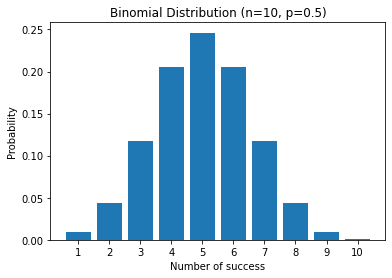

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)

rv = binom(n=10, p=0.5)
x=np.arange(1,11)
ax.bar(x, rv.pmf(x))
ax.set_ylabel('Probability')
ax.set_xlabel('Number of success')
ax.set_xticks(x)
ax.set_title('Binomial Distribution (n=10, p=0.5)');

In [ ]:
# The corresponding number of success by percent point function 
rv.ppf(0.01)

1.0

In [ ]:
# The probability of 7 heads?
rv.pmf(7)

0.11718750000000014

In [ ]:
# The probability of 7 or fewer heads?
rv.cdf(7)

0.9453125

In [ ]:
# The probability of more than 7 heads?
1-rv.cdf(7)

0.0546875

# Normal Distribution

- symmetrical
- total area = 1
- curve (probability) never hits 0
- described by mean and standard deviation
- 68% falss within 1 standard deviation; 95% falls within 2 standard deviations; 99.7% falls within 3 standard deviations

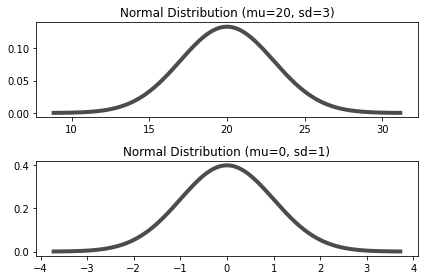

In [ ]:
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(2,1)

rv1 = norm(loc=20, scale=3)
x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 1000)
ax1.plot(x, rv1.pdf(x), color='k', alpha=0.7, linewidth=4)
ax1.set_title('Normal Distribution (mu=20, sd=3)')

rv2 = norm() # default loc=0, scale=1
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 1000)
ax2.plot(x, rv2.pdf(x), color='k', alpha=0.7, linewidth=4)
ax2.set_title('Normal Distribution (mu=0, sd=1)')

fig.tight_layout()
fig;

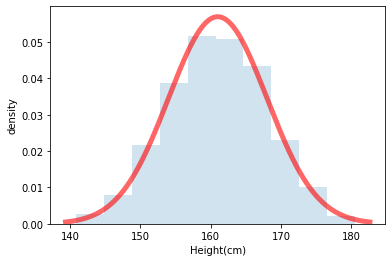

In [ ]:
fig, ax = plt.subplots(1,1)

height_dist = norm(loc=161, scale=7)
x=np.linspace(height_dist.ppf(0.001), height_dist.ppf(0.999), 10000)
ax.plot(x, height_dist.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(height_dist.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2)
ax.set_xlabel('Height(cm)')
ax.set_ylabel('density')
plt.show();

In [ ]:
# What percent of female population is shorter than 154 cm?

height_dist.cdf(154)

0.15865525393145707

In [ ]:
# What percent of female population is taller than 154 cm?

1-height_dist.cdf(154)

0.8413447460685429

In [ ]:
# What percent of female population is between 154 and 157 cm?

height_dist.cdf(157)-height_dist.cdf(154)

0.1251993291672192

In [ ]:
# What height are 90% of women shorter than? -- left tail
height_dist.ppf(0.9)

169.9708609588122

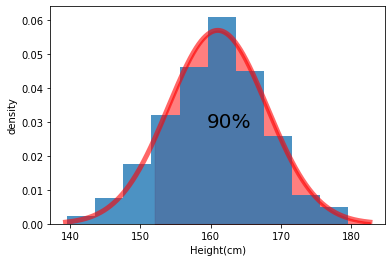

In [ ]:
fig, ax = plt.subplots(1,1)

height_dist = norm(loc=161, scale=7)
x=np.linspace(height_dist.ppf(0.001), height_dist.ppf(0.999), 10000)
ax.plot(x, height_dist.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(height_dist.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.8)

right_90_x = x[x>=height_dist.ppf(0.1)] 
ax.fill_between(right_90_x, height_dist.pdf(right_90_x), color='red', alpha=0.5)
ax.text(x=height_dist.mean()*0.99, y=height_dist.pdf(height_dist.mean())/2, s='90%', size=20)
ax.set_xlabel('Height(cm)')
ax.set_ylabel('density')
plt.show();

In [ ]:
# What height are 90% of women taller than? -- right tail
height_dist.ppf(0.1)

152.0291390411878

In [ ]:
# Generating random numbers

norm.rvs(loc=161, scale=7, size=10)

array([154.33408996, 158.60563402, 166.17138031, 157.13033522,
       156.16595175, 173.73033658, 152.83057435, 166.58420618,
       165.45510244, 155.97662004])

# Sampling Distribution (Central Limit Theorem)

Take binomial as example:

- one sample mean: roll the dice 5 times, take the mean
- sample means: repeat 1000 times, take each sample's mean, resulting in 1000 sample means
- sampling distribution: The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases. 


In [ ]:
from scipy.stats import uniform

sampling_means = []

for i in range(1000):
  ten_rolls_means = []
  for i in range(10):
    five_rolls_means = [uniform.rvs(loc=3.5, scale=1, size=5).astype(int).mean()]
    ten_rolls_means += five_rolls_means
  sampling_means+=[np.mean(ten_rolls_means)]
  

In [ ]:
len(sampling_means)

1000

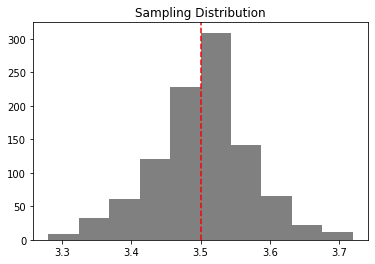

In [ ]:
fig, ax = plt.subplots(1,1)

ax.hist(sampling_means, color='gray')
ax.axvline(np.mean(sampling_means), color='red', linestyle='--')
ax.set_title('Sampling Distribution')
plt.show()

In [ ]:
# Estimate expected value of die
np.mean(sampling_means)

3.5002799999999996

# Poisson distribution

**Poisson Process**
- Events appear to happen at a certain rate, but completely at random
- Examples:
  - Number of animals adopted from an animal shelter per week
  - Number of people arriving at a restaurant per hour
  - Number of earthquakes in California per year

**Poisson Distribution**
- Probability of some # of events occuring over a fixed period of time
- Examples:
  - Prob of >= 5 animals adopted from an animal shelter per week
  - Prob of 12 people arriving at a restaurant per hour
  - Prob of < 20 earthquakes in California per year

**Parameters**
- λ = average number of events per time interval
- λ is the distribution peak 
- $E[X]=λ$
- $Var[X]=λ$

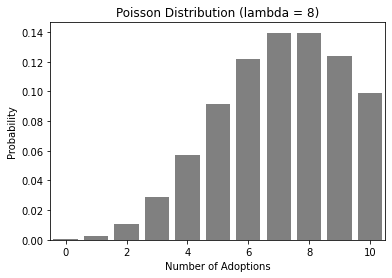

In [ ]:
from scipy.stats import poisson
fig, ax = plt.subplots(1,1)

dist = poisson(mu=8)
x=np.arange(dist.ppf(0.000), dist.ppf(0.999))
ax.bar(x, dist.pmf(x), color='gray')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of Adoptions')
ax.set_title('Poisson Distribution (lambda = 8)')
ax.set_xlim(-0.5, 10.5);

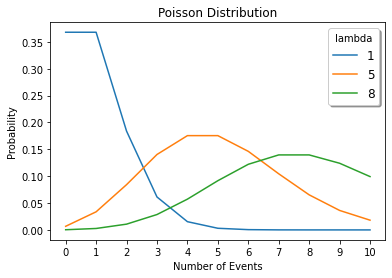

In [ ]:
fig, ax = plt.subplots(1,1)

for mu in [1,5, 8]:
  dist = poisson(mu=mu)
  x=np.arange(0, 11)
  ax.plot(x, dist.pmf(x), label=f'{mu}')

legend = ax.legend(loc='best', shadow=True, fontsize='large', title='lambda')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of Events')
ax.set_xticks(x)
ax.set_title('Poisson Distribution');

λ is the distribution peak

In [ ]:
# if the average number of adoptions per week is 8, what is P(# of adoptions in a week = 5)?

dist=poisson(mu=8)
dist.pmf(5)

0.09160366159257921

In [ ]:
# if the average number of adoptions per week is 8, what is P(# of adoptions in a week <= 5)?
dist.cdf(5)

0.19123606207962532

In [ ]:
# if the average number of adoptions per week is 8, what is P(# of adoptions in a week > 5)?
1-dist.cdf(5)

0.8087639379203747

In [ ]:
# if the average number of adoptions per week is 10, what is P(# of adoptions in a week > 5)?
1-poisson(mu=10).cdf(5)

0.9329140371209681

In [ ]:
# random sampling from Poisson distribution
poisson(mu=8).rvs(size=10)

array([ 7, 11, 15,  6,  8,  7,  4,  7,  6, 13])

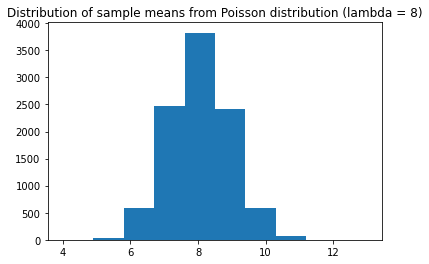

In [ ]:
# Central Limit Theorem still applies

sampling_mean = []
for i in range(1, 10000):
  sampling_mean += [(poisson(mu=8).rvs(size=10)).mean()]

fig, ax = plt.subplots(1,1)
ax.hist(sampling_mean, range=(4, 13))
ax.set_title('Distribution of sample means from Poisson distribution (lambda = 8)')
plt.show()  

# Exponential distribution

- Probability of time between Poisson events
- Examples
  - Prob of >1 day between adoptions
  - Prob of <10 minutes between restaurant arrivals
  - Prob of 6-8 months between earthquakes
- also uses lambda rate
- continuous (time)

On Average, one customer service ticket is created every 2 minutes.
- expected value of exponential distribution
  - λ=0.5 requests per minute (in terms of rate, Poisson)
  - 1/λ=1 request per 2 minutes (in terms of time, exponential)

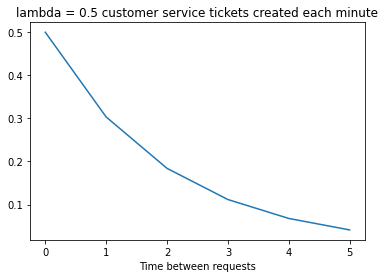

In [ ]:
from scipy.stats import expon

fig, ax = plt.subplots(1,1)

dist = expon(scale=2)
x=np.arange(0, 6)

ax.plot(x, dist.pdf(x))
ax.set_title('lambda = 0.5 customer service tickets created each minute')
ax.set_xlabel('Time between requests')
plt.show()

In [ ]:
# How long until a new request is created?
# P(wait < 1 min)

expon(scale=2).cdf(1)

0.3934693402873666

In [ ]:
# P(wait > 4 min)

1- expon(scale=2).cdf(4)

0.1353352832366127

In [ ]:
# P(1 min < wait < 4 min)

expon(scale=2).cdf(4) - expon(scale=2).cdf(1)

0.4711953764760207

# Student's t-distribution

- similar shape as the normal distribution
- degree of freedom
  - has parameter degrees of freedom (df) which affects the thickness of the tails
    - lower df = ticker tails, higher standard deviation
    - higher df = closer to normal distribution

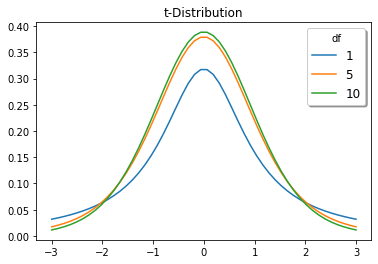

In [ ]:
from scipy.stats import t

fig, ax = plt.subplots(1,1)

x = np.linspace(-3, 3)
for i in [1,5, 10]:
  dist = t(df=i)
  ax.plot(x, dist.pdf(x), label=f'{i}')

legend = ax.legend(loc='best', shadow=True, fontsize='large', title='df')
ax.set_title('t-Distribution')
plt.show()

# Geometric Distribution
from [cuemeth]((https://www.cuemath.com/geometric-distribution-formula/):

**Definition:**

<i>"Geometric distribution is a type of discrete probability distribution that represents the probability of the number of successive failures before a success is obtained in a Bernoulli trial. A Bernoulli trial is an experiment that can have only two possible outcomes, ie., success or failure."</i> 

**Three asssumptions:**
- The trials being conducted are independent.
- There can only be two outcomes of each trial - success or failure.
- The success probability, denoted by p, is the same for each trial.